Proyecto Individual

Angela Lira 


Para el desarrollo de este proyecto se estudiará un sistema hibrido de producción de energía que incluye paneles fotovoltaicos, turbinas eólicas y celdas PEMFC. Durante el transcurso de este escrito se profundizará en la celda de combustible con membrana de intercambio de protones. Estas constituyen un peldaño fundamental en la transición de la matriz energética puesto que tienen una eficiencia de hasta el 65%, al usar hidrógeno como combustible no generan emisiones de dioxido de carbono durante su operación. De esta forma, se ha implementado en industrias como la generación estacionario, transporte (incluido el uso de vehículos eléctricos de cleda de combustible) y dispositivos portátiles (Wang, 2022). 

En cuanto a la cobertura nacional de este tipo de tecnologías se tiene que existen 55 instalaciones de cogeneración de energía eléctrica y térmica con una producción de energía en conjunto de aproximadamente 9000 MW. Respecto a las membranas PEMFC, estas corresponden a una tecnología que se empezó a desarrollar comercialmente recien en 1970 versus sus análogos que ya formaban parte del mercado desde principios del siglo XX (GIZ, 2018). Es por esto, que actualmente su implementación viene dada en proyectos de baja escala, principalmente pilotos de hasta 2 MW por electrolizador. Actualmente, en Chile se han implementado proyectos por la GIZ en proyectos mineros en la región de Antofagasta. No obstante, este tipo de mecanismos tienen un gran potencial dentro del territorio nacional puesto que existen 55 plantas de cogeneración de energía a partir de fuentes de energía renovables (GIZ, 2019). 

En cuanto a su impacto a escala mundial, países como Estados Unidos ha comprado 10.000 unidades de celdas PEM. Por su parte, tanto Japón como China cuentan con 3.520 y 6.000 unidades en operación respectivamente. No obstante, el costo elevado de estos avances que en la actualidad corresponde a 75 USD por kW pero con meta de 30-60 USD y la falta de estaciones de reabastecimiento de hidrógeno limitan su implementación a mayor escala. De esta forma, existen iniciativas como el programa Hydrogen Shot en EEUU que busca reducir los costos a 1 USD por kg de hidrógeno durante la próxima decáda (Wang, 2022). 

Las celdas de combustible son convertidores electroquímicos que generan energía eléctrica y calor. Funcionan mediante una membrana polimerica de protones con grosores menores a 50 µm como el electrolito. Los catalizadores utilizados corresponden tipicamente a platino soportado en carbón. La membrana no permite el traspaso de los gases, pero si de los protones. Esta se situa entre dos electrodos formados tipicamente por carbono y recubiertos en catalizadores. Dentro de la celda, el hidrógeno transita por el anodo en el cual se separa en electrones y protones. Los electrones circulan a través de un circuito externo generando electricidad mientras que los protones cruzan por la membrana para luego volver a formar agua como subproducto (Barbir, 2013). 


Para el desarrollo de este trabajo, se replicará el modelo de Shan-Gai He y Bao-Lian Yi. Para esto es necesario importar las librerias de Numpy para los cálculos matemáticos y Matplot para el desarrollo de gráficos. 
En este se aplican de manera principal las siguientes ecuaciones para el modelado de la celda de combustible 
$$ E_(cell) = E_0 - \eta(x) - (R_m + R_co)\cdot I(x) $$

$$ \sigma_T = \exp(1268(\frac{1}{303}-\frac{1}{T}))\cdot(0.5139\lambda - 0.326) $$  

$$ R_m = \delta_m/\sigma_T $$

$$ \eta_(x) = \frac{RT}{0.5F}\cdot \ln(\frac{I}{I_0(P_{h2}/P_0}) $$

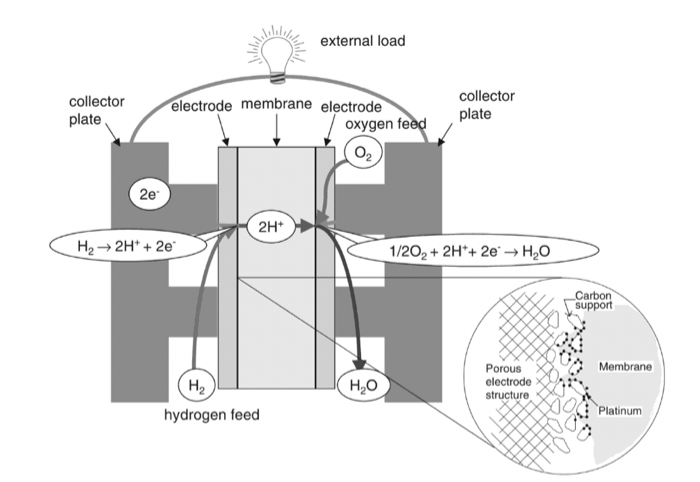

In [3]:
from IPython.display import Image, display
display(Image(filename="esquema.png"))

En la imagen se puede apreciar de manera ilustrada el comportamiento de la celda

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Luego se definen las constantes, tanto las del paper como valores obtenidos de otras fuentes bibliográficas (citadas en la sección de bibliográfia) respecto del hidrógeno. 

In [8]:
E0 = 1.05  # Potencial estándar (V)
R = 8.314  # Constante universal de gases (J/mol·K)
F = 96485  # Constante de Faraday (C/mol)
I0 = 40  # Densidad de corriente de intercambio (A/m²)
Rco = 1e-5  # Resistencia de contacto (Ω·m²)
T = 353  # Temperatura (K)
P_H2 = 4e5  # Presión parcial de H2 (Pa)
P_O2 = 4e5  # Presión parcial de O2 (Pa)
delta_m = 0.5e-4  # Espesor de la membrana (m)
lamda = 14  # Hidratación del polímero


Luego, se procede a establecer las funciones que se utilizarán. Dentro de estas esta el 

In [9]:
def sobrepotencial_activacion(I, T):
    return (R * T / (0.5 * F)) * np.log(I / I0)

def resistencia_ohmica(T, lamda):
    sigma = np.exp(1268 * (1 / 303 - 1 / T)) * (0.5139 * lamda - 0.326)
    if sigma <= 0:
        sigma = 1e-6  # Evitar divisiones por cero
    return delta_m / sigma + Rco

def sobrepotencial_concentracion(I, T, I_lim=1.5):
    if I >= I_lim:  
        return float('inf') 
    else:
        return - (R * T / F) * np.log(1 - I / I_lim)

def potencial_celda(I, T, P_H2, P_O2):
    eta_activacion = sobrepotencial_activacion(I, T)
    Rm = resistencia_ohmica(T, lamda)
    eta_ohmica = Rm * I
    eta_concentracion = sobrepotencial_concentracion(I, T)
    return E0 - eta_activacion - eta_ohmica - eta_concentracion

Luego, se procede a graficar el potencial de celda versus la densidad de corriente. 

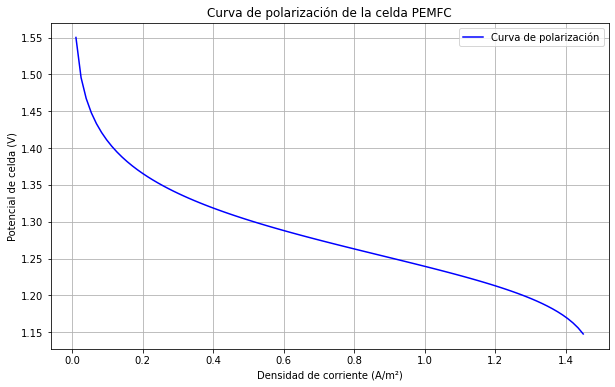

In [15]:
# Rango de densidad de corriente
I = np.linspace(0.01, 1.45, 100)  # A/m²

# Calcular el potencial de la celda para cada densidad de corriente
V_celda = [potencial_celda(i,350.15,4e5,4e5) for i in I] ## los valores 
#de presión y temperatura se pueden cambiar 

# Graficar la curva de polarización
plt.figure(figsize=(10, 6))
plt.plot(I, V_celda, label="Curva de polarización", color="blue")
plt.title("Curva de polarización de la celda PEMFC")
plt.xlabel("Densidad de corriente (A/m²)")
plt.ylabel("Potencial de celda (V)")
plt.grid(True)
plt.legend()
plt.show()

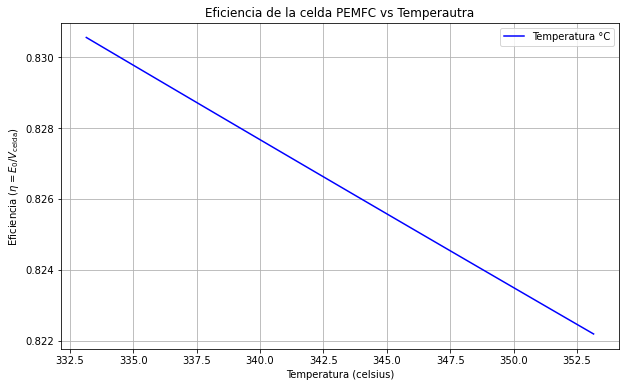

In [11]:
temperaturas =np.linspace(273.15+60,273.15+80,100)
eficiencia_0 = []
eficiencia_real = []
i_celda = 0.7 #este valor se puede iterar
V_celda = [potencial_celda(i_celda,T,4e5,4e5) for T in temperaturas]
for i in temperaturas:
    eficiencia_0.append(E0)

for j in range(0,100):
    eficiencia_1 = eficiencia_0[j]/V_celda[j]
    if eficiencia_1<= 1:
        eficiencia_real.append(eficiencia_1)
    else:
        eficiencia_real.append(1)

plt.figure(figsize=(10, 6))
plt.plot(temperaturas, eficiencia_real, label=f"Temperatura °C", color="blue")
plt.title("Eficiencia de la celda PEMFC vs Temperautra")
plt.xlabel("Temperatura (celsius)")
plt.ylabel("Eficiencia ($\eta = E_0 / V_{\mathrm{celda}}$)")
plt.grid(True)
plt.legend()
plt.show()

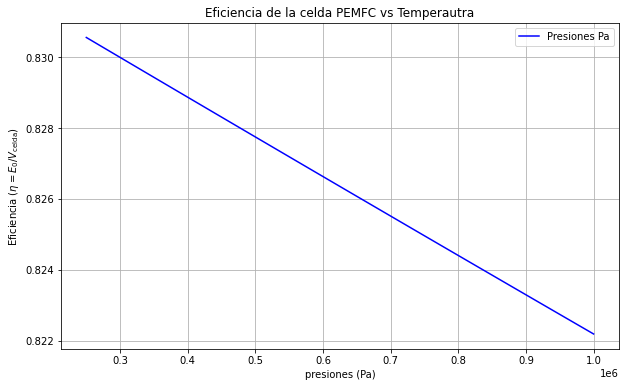

In [16]:
presiones =np.linspace(2.5e5,10e5,100)
eficiencia_0 = []
eficiencia_variando_presiones = []
i_celda = 0.5 #este valor se puede iterar
V_celda = [potencial_celda(i_celda,350,p,p) for p in presiones]
for p in presiones:
    eficiencia_0.append(E0)

for j in range(0,100):
    eficiencia_2 = eficiencia_0[j]/V_celda[j]
    if eficiencia_2<= 1:
        eficiencia_variando_presiones.append(eficiencia_2)
    else:
        eficiencia_variando_presiones.append(1)

plt.figure(figsize=(10, 6))
plt.plot(presiones, eficiencia_real, label=f"Presiones Pa", color="blue")
plt.title("Eficiencia de la celda PEMFC vs Temperautra")
plt.xlabel("presiones (Pa)")
plt.ylabel("Eficiencia ($\eta = E_0 / V_{\mathrm{celda}}$)")
plt.grid(True)
plt.legend()
plt.show()


El proyecto brindo un estado del arte respecto de las PEMFC tanto a nivel mundial como nacional. Dentro de esto, se destacó su importanciacomo pilar fundamental en la transición energetica puesto que es capaz de generar energía sin emitir dióxiodo de carbono a la atmósfera. Esto supone una oportunidad de implementación importante en el territorio nacional, sobre todo para complementar proyectos de producción de energía eólica, fotovoltaica o híbridos. No obstante, como se mencionó anteriormente los costos de implementación suponen una barrera importante en la actualidad por lo que es importante evaluar subenciones estatales para la producción de energía como la mencionada en Estados Unidos denominada Hydrogen Shot. En cuanto a las tecnologicas, como se desarrollo durante este trabajo mantener las densidades de corriente bajas y las temperaturas controladas mejora el potencial de celda producido y la eficiencia respectivamente. Respecto de las barreras sociales, es importante tener en consideración que las instalaciones de producción de hidrógeno no desplacen comunidades indígenas o profanar lugares sagrados para ellas. Adicionalmente, las intervenciones de producción de energía ocupan gran cantidad de espacio por lo que deben hacerse de manera en conjunta con la comunidad para no invadir sus espacios. 

Barbir, F. (2013). PEM Fuel Cells. El Servier. https://books.google.cl/bookshl=es&lr=&id=090dmOwMcdoC&oi=fnd&pg=PP1&dq=how+does+a+PEMFC+work&ots=lxUdaTWqxI&sig=Z-V14nZZcnqgv5JIWZKyBu4c6rE&redir_esc=y#v=onepage&q&f=false

Ge, S.-H., & Yi, B.-L. (2003). A mathematical model for PEMFC in different flow modes. Journal of Power Sources, 124(1), 1–11. https://doi.org/10.1016/S0378-7753(03)00584-6

Ministerio de Energía de Chile & Deutsche Gesellschaft für Internationale Zusammenarbeit (GIZ) GmbH. (2019). Instalaciones existentes de cogeneración en Chile. https://www.cogeneraeficiente.cl/wp-content/uploads/2021/03/Instalaciones-de-Cogeneraci%C3%B3n-Existentes-VF.pdf


Ministerio de Energía de Chile & Deutsche Gesellschaft für Internationale Zusammenarbeit (GIZ) GmbH. (2019). Tecnologías del hidrógeno y perspectivas para Chile. https://4echile.cl/wp-content/uploads/2020/07/LIBRO-TECNOLOGIAS-H2-Y-PERSPECTIVAS-CHILE.pdf


Ministerio de Energía de Chile. (2024). Reporte de proyectos en construcción e inversión en el sector energía: Enero 2024. https://energia.gob.cl/sites/default/files/documentos/reporte_de_proyectos_-_enero_2024.pdf

Wang, Y., Pang, Y., Xu, H., Martinez, A., & Chen, K. S. (2022). PEM fuel cell and electrolysis cell technologies and hydrogen infrastructure development – a review. Energy & Environmental Science, 15(6), 2288-2327. https://doi.org/10.1039/D2EE00790H

Zhang, J., Xie, Z., Zhang, J., Tang, Y., Song, C., Navessin, T., ... & Wang, H. (2006). A review of proton exchange membrane fuel cell models: Development and applications. Journal of Power Sources, 160(2), 872-891. https://doi.org/10.1016/j.jpowsour.2006.02.057
